# wlXlv Image

In [95]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage

def count_rice_number(img_path):
    # Load the uploaded image
    img = cv2.imread(img_path)
    
    ## Convert image to grayscale image 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_np = np.array(gray)

    ############################################################
    ##### Add MedianFilter to remove salt and pepper noise #####
    ############################################################
    gray = cv2.medianBlur(gray, 3)

    #############################################
    ######## Apply Fourier Transform ############
    #############################################
    f = np.fft.fft2(np.array(gray))
    fshift = np.fft.fftshift(f)
    # Calculate magnitude and phase of frequency spectrum
    magnitude = np.abs(fshift)
    phase = np.angle(fshift)
    # Create a mask to remove the high frequencies related to the stride
    rows, cols = img_np.shape
    crow, ccol = rows // 2 , cols // 2   # center
    # Create a mask with high frequencies (outside a certain radius) removed
    mask = np.ones((rows, cols), np.uint8)
    # Remove frequencies outside the central low-frequency components (keep low-frequency data)
    mask[crow, ccol - 8] = 0
    mask[crow, ccol + 8] = 0
    new_maginute = magnitude * mask
    # Combine magnitude and phase information
    fft_shifted_img = new_maginute * np.exp(1j * phase)
    # Apply inverse shift to move origin back to top-left
    f_ishift = np.fft.ifftshift(fft_shifted_img)
    # Inverse Fourier Transform to get the image back
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)


    ##########################################
    ########### Image Enhancement ############
    ##########################################
    ## Increase the brightness by 50
    gray = img_filtered.astype(np.uint8)
    gray = cv2.convertScaleAbs(gray, alpha=1, beta=50)
    ## Apply CLAHE to enhance constrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)

    gamma = 2.2
    gray = cv2.convertScaleAbs(gray, alpha=1, beta=0)

    ##########################################
    ####### Convert to binary image ##########
    ##########################################
    ## Convert image to binary image using thresholding with otsu threshold
    # _, thresh_image = cv2.threshold(gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 1)


    ##########################################
    ######## Process on binary image #########
    ##########################################
    ## Apply erosion to deal with sticking object
    kernel = np.ones((3, 3), np.uint8)
    thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_OPEN, kernel, iterations=3)
    kernel = np.ones((5, 5), np.uint8)
    thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_ERODE, kernel, iterations=1)
    # thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=1)

    ########################################################################
    ######  Caculate the number of rice using count connectedComponets #####
    ########################################################################
    num_labels, labels = cv2.connectedComponents(thresh_image)

    print(f"The number of rice in the image is {num_labels}")
    return Image.fromarray(thresh_image)

The number of rice in the image is 100


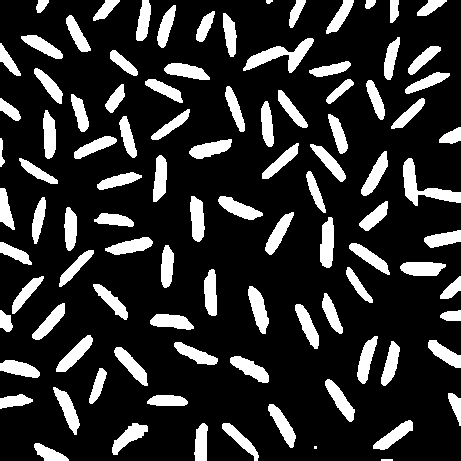

In [96]:
count_rice_number("data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ.png")

The number of rice in the image is 99


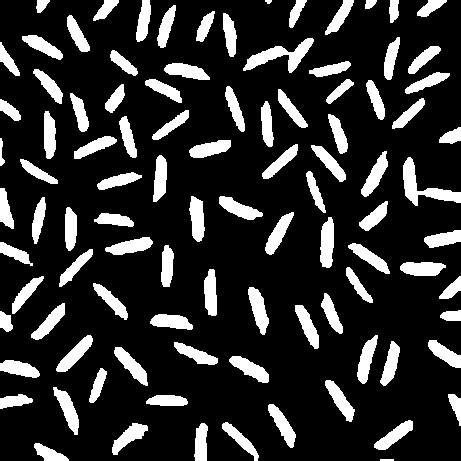

In [97]:
count_rice_number("data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png")

The number of rice in the image is 94


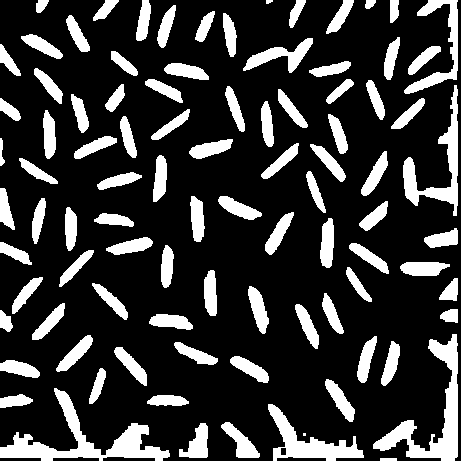

In [98]:
count_rice_number("data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png")

The number of rice in the image is 101


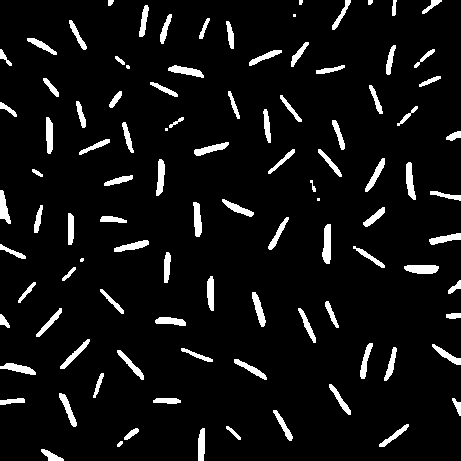

In [99]:
count_rice_number("data/prj1-2/1_zd6ypc20QAIFMzrbCmJRMg.png")